<a href="https://colab.research.google.com/github/it20648404/DL_LAB_007/blob/main/lab_7_AE_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [13]:
(x_train, _1), (x_test, _2) = fashion_mnist.load_data()
# _1 and _2 are labels but we are not using thme in AE

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

        self.encoder = tf.keras.Sequential([
          layers.Flatten(input_shape=(28,28)),
          layers.Dense(latent_dim, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
          layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
          layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded



In [16]:
shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [17]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))
#default batch size is 32 (32x1875)

Epoch 1/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0237 - val_loss: 0.0134
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 4/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [19]:
print(autoencoder.encoder.summary())
print('\n\n')
print(autoencoder.decoder.summary())
print('\n\n')
print(autoencoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                    

In [20]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [21]:
decoded_imgs.shape

(10000, 28, 28)

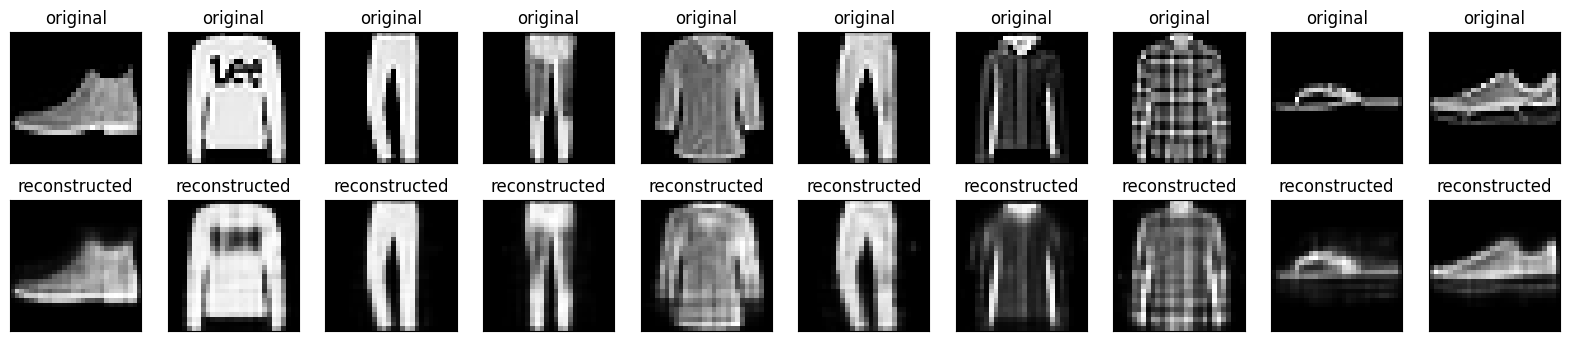

In [22]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
# Calculate Mean Squared Error loss for the test dataset
mse_loss = autoencoder.evaluate(x_test, x_test)
print(f"Mean Squared Error Loss on Test Data: {mse_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0087
Mean Squared Error Loss on Test Data: 0.008720598183572292


Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 10/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0

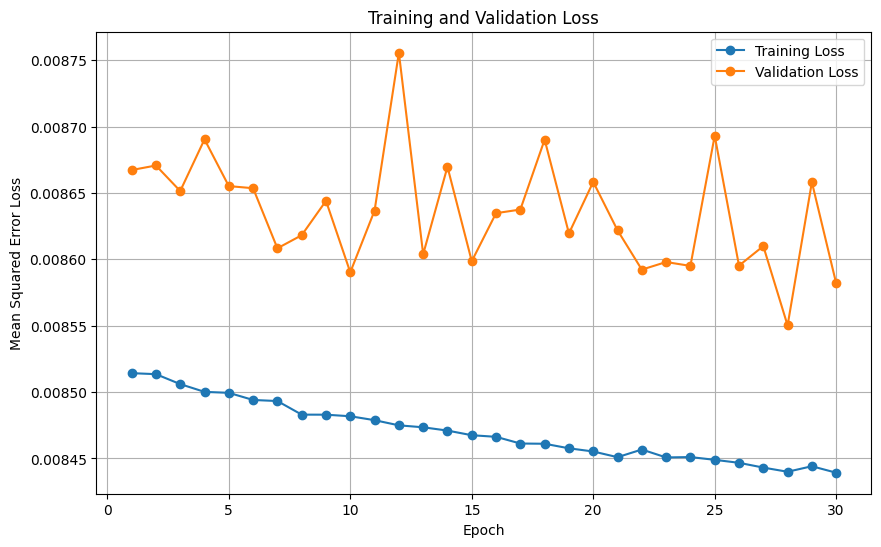

In [24]:
import matplotlib.pyplot as plt

# Train the autoencoder and store the training history
history = autoencoder.fit(x_train, x_train,
                          epochs=30,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.grid(True)
plt.show()